In [1]:
pip install textblob

In [12]:
from textblob import TextBlob
from wordcloud import WordCloud

In [3]:
import pandas as pd

df = pd.read_csv('beats_reviews_full.csv')
df_comp = pd.read_csv('beats_competitors.csv')

In [16]:
# polarity and subjectivity column
df_comp['polarity'] = df_comp['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_comp['subjectivity'] = df_comp['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

df['polarity'] = df_comp['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df_comp['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

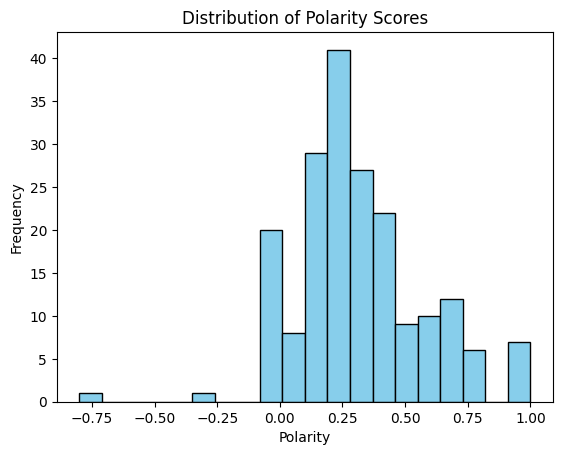

In [17]:
#beats polarity
import matplotlib.pyplot as plt

plt.hist(df_comp['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

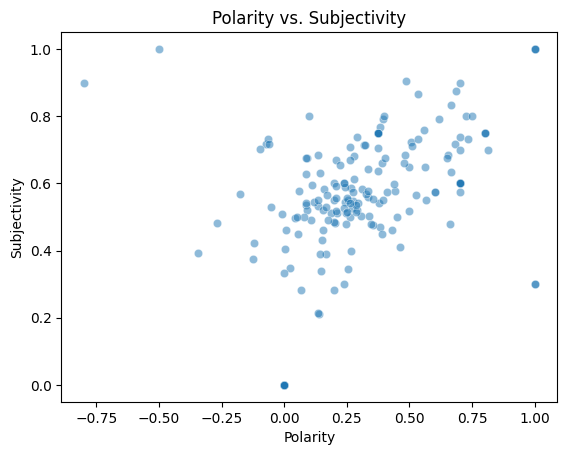

In [8]:
# beats polarity vs subjectivity
import seaborn as sns

# scatter plot
sns.scatterplot(x='polarity', y='subjectivity', data=df, alpha=0.5)
plt.title("Polarity vs. Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

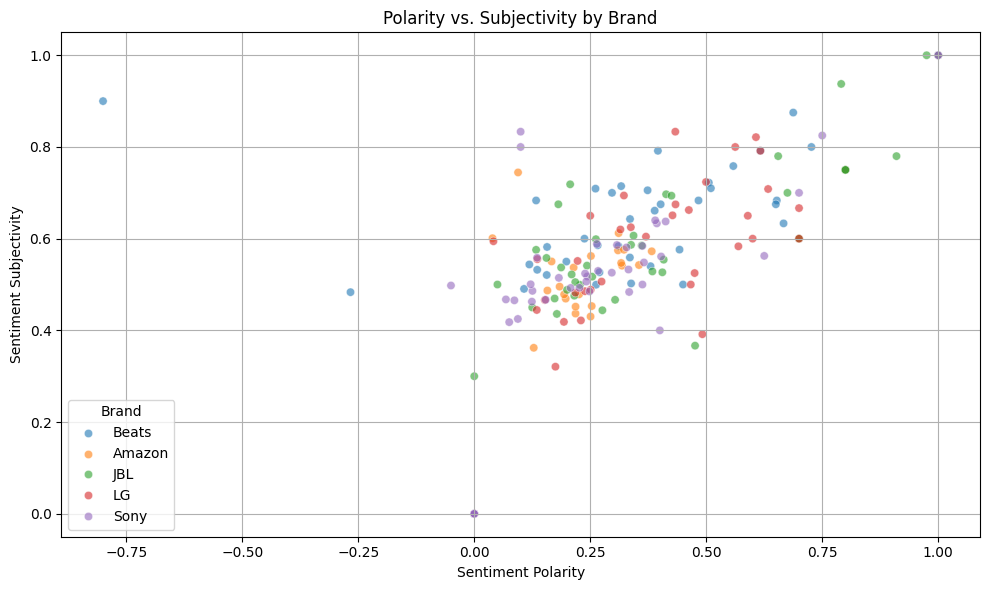

In [46]:
#polarity vs subjectivity for each brand

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_comp, x='polarity', y='subjectivity', hue='product', alpha=0.6)

plt.title("Polarity vs. Subjectivity by Brand")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Sentiment Subjectivity")
plt.legend(title="Brand")
plt.grid(True)
plt.tight_layout()
plt.show()


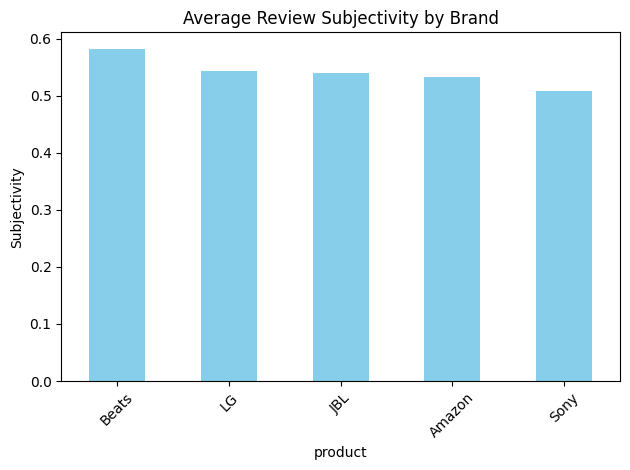

In [47]:
brand_avg['subjectivity'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Average Review Subjectivity by Brand")
plt.ylabel("Subjectivity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


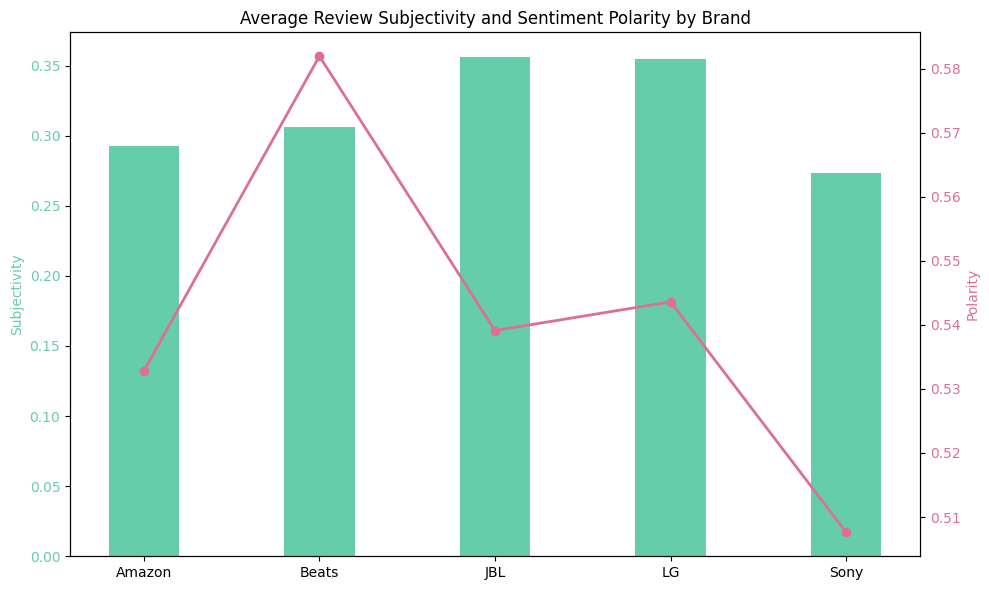

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

df_avg = df_comp.groupby('product')[['polarity', 'subjectivity']].mean().reset_index()

# plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# bar chart for Subjectivity
color1 = 'mediumaquamarine'
ax1.bar(df_avg['product'], df_avg['polarity'], color=color1, width=0.4, align='center', label='Subjectivity')
ax1.set_ylabel('Subjectivity', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# create a second y-axis for polarity
ax2 = ax1.twinx()
color2 = 'palevioletred'
ax2.plot(df_avg['product'], df_avg['subjectivity'], color=color2, marker='o', linewidth=2, label='Polarity')
ax2.set_ylabel('Polarity', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Average Review Subjectivity and Sentiment Polarity by Brand')
fig.tight_layout()

plt.show()


In [9]:
def categorize_sentiment(polarity):
    if polarity > 0.65:
        return 'Very Positive'
    elif polarity > 0.2:
        return 'Positive'
    elif polarity < -0.65:
        return 'Very Negative'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# apply categorization
df['sentiment'] = df['polarity'].apply(categorize_sentiment)

# count number of each sentiment
sentiment_count = df['sentiment'].value_counts().reset_index()
print(sentiment_count)

       sentiment  count
0       Positive     87
1        Neutral     78
2  Very Positive     27
3       Negative      3
4  Very Negative      1


<ipython-input-10-99a7858f2520>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='count', data=sentiment_count, palette='pastel')


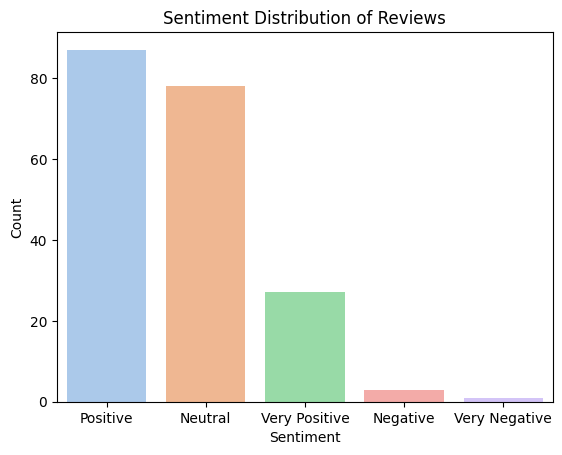

In [10]:
sentiment_count.columns = ['sentiment', 'count']

sns.barplot(x='sentiment', y='count', data=sentiment_count, palette='pastel')
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

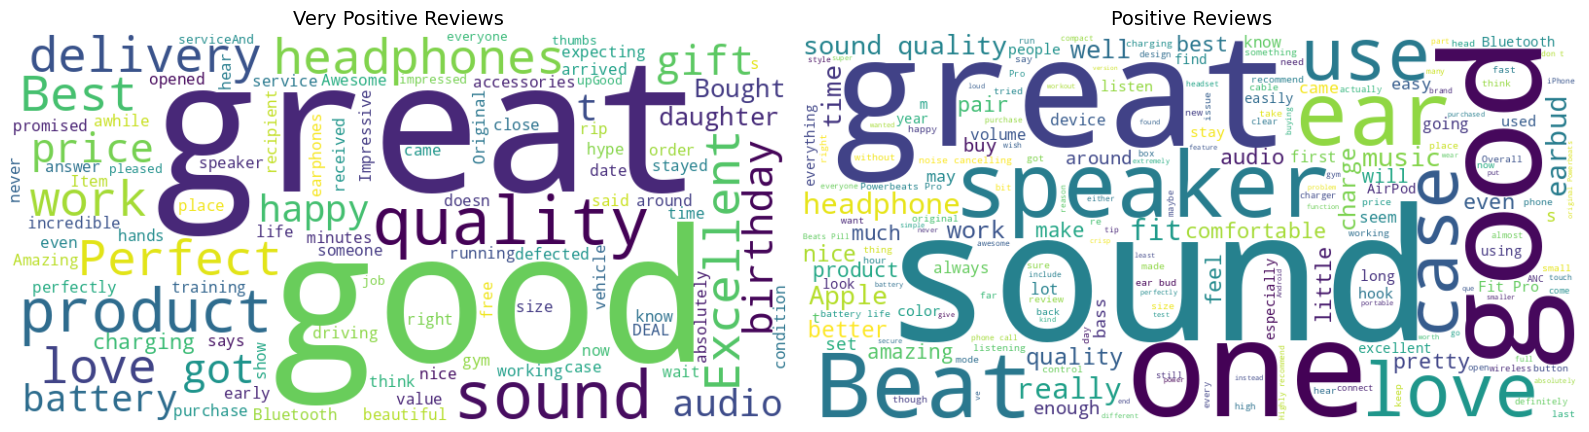

In [13]:
# separate positive / very positive
very_positive_reviews = " ".join(df[df['sentiment'] == 'Very Positive']['content'])
positive_reviews = " ".join(df[df['sentiment'] == 'Positive']['content'])

# generate word clouds
very_positive_wc = WordCloud(background_color='white', width=800, height=400).generate(very_positive_reviews)
positive_wc = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

# display
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

axs[0].imshow(very_positive_wc, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title("Very Positive Reviews", fontsize=14)

axs[1].imshow(positive_wc, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title("Positive Reviews", fontsize=14)

plt.tight_layout()
plt.show()

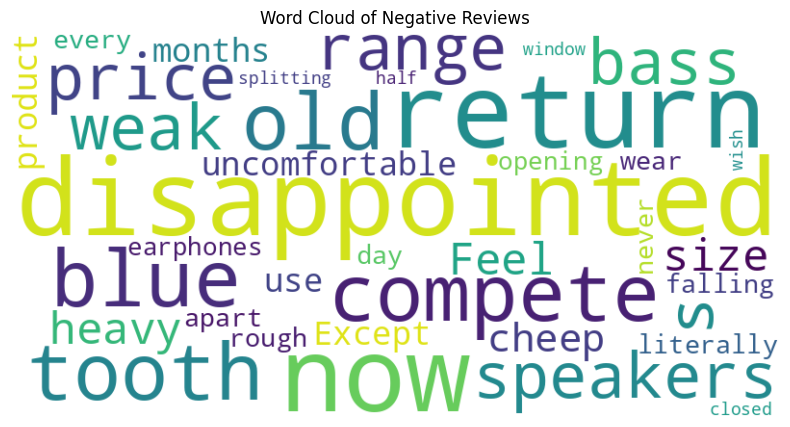

In [14]:
from wordcloud import WordCloud

# negative reviews
negative_reviews = " ".join(df[df['sentiment'] == 'Negative']['content'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(negative_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Reviews")
plt.show()

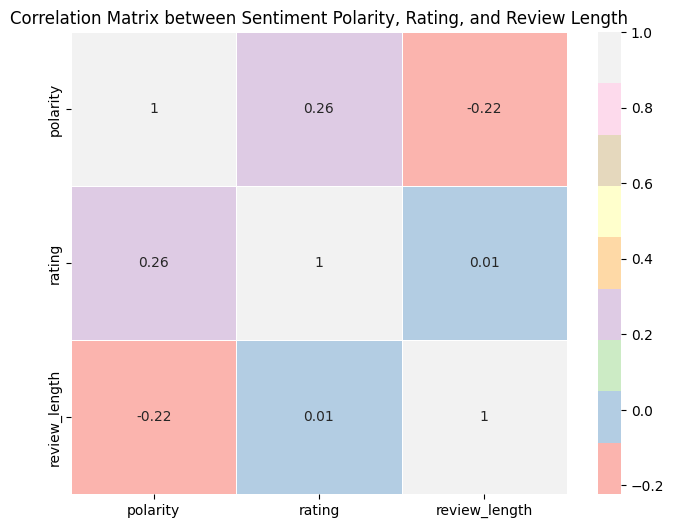

In [25]:
df_comp['review_length'] = df_comp['content'].apply(lambda x: len(x))

correlation_columns = ['polarity', 'rating', 'review_length']
correlation_matrix = df_comp[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Matrix between Sentiment Polarity, Rating, and Review Length')
plt.show()

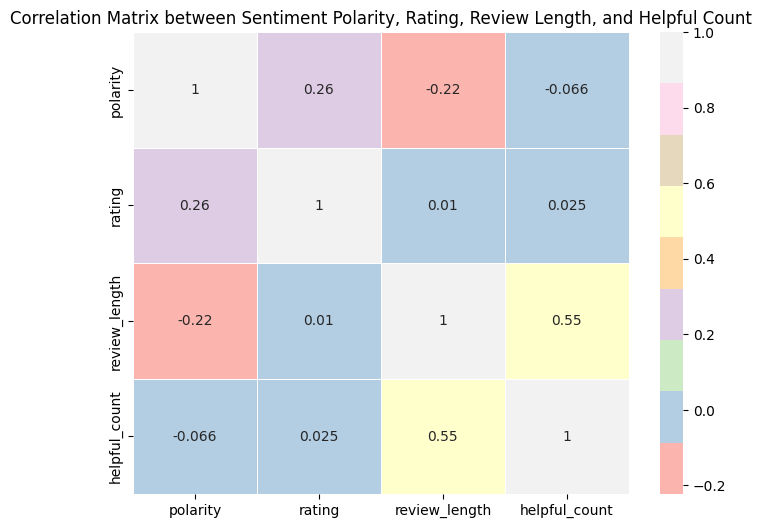

In [29]:
correlation_columns = ['polarity', 'rating', 'review_length', 'helpful_count']
correlation_matrix = df_comp[correlation_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Pastel1', linewidths=0.5)
plt.title('Correlation Matrix between Sentiment Polarity, Rating, Review Length, and Helpful Count')
plt.show()